In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'] # set a name for the columns
df=pd.read_csv('magic04.data',names = cols)
df['class'] = (df['class'] == 'g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [3]:
train , valid , test = np.split(df.sample(frac = 1) , [int(0.6*len(df)), int(0.8*len(df))]) #splitting the data 

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [4]:
def scale_dataset(dataframe, oversample = False) :
    x = dataframe[dataframe.columns[:-1]].values 
    y = dataframe[dataframe.columns[-1]].values 
    if oversample : #just to keep sampling from the lower data to be equal
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y)
    scaler = StandardScaler()
    x= scaler.fit_transform(x) # standrdization the numbers
    data = np.hstack((x , np.reshape(y,(-1,1)))) #stacking the data to be X agianst Y
    return data , x , y

In [5]:
train , x_train , y_train = scale_dataset(train, oversample = True)
valid , x_valid , y_valid = scale_dataset(valid, oversample = False)
test , x_test , y_test = scale_dataset(test, oversample = False)

## KNN Model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
# Train the model
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(x_train , y_train)
# Predicts
y_predict = knn_model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1347
           1       0.85      0.84      0.85      2457

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



## Gaussian

In [7]:
from sklearn.naive_bayes import GaussianNB
bayen_model = GaussianNB()
bayen_model.fit(x_train , y_train)
y_predict = bayen_model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.60      0.46      0.52      1347
           1       0.74      0.83      0.78      2457

    accuracy                           0.70      3804
   macro avg       0.67      0.65      0.65      3804
weighted avg       0.69      0.70      0.69      3804



## Liner Regression

In [8]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)
y_predict = lg_model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.63      0.77      0.70      1347
           1       0.86      0.75      0.80      2457

    accuracy                           0.76      3804
   macro avg       0.75      0.76      0.75      3804
weighted avg       0.78      0.76      0.76      3804



## SVM

In [9]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train,y_train)
y_predict = svm_model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1347
           1       0.91      0.84      0.87      2457

    accuracy                           0.84      3804
   macro avg       0.82      0.84      0.83      3804
weighted avg       0.85      0.84      0.84      3804



Epoch 1/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6616 - loss: 0.9429 - val_accuracy: 0.8212 - val_loss: 0.4337
Epoch 2/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8037 - loss: 0.4255 - val_accuracy: 0.8273 - val_loss: 0.4346
Epoch 3/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8199 - loss: 0.3997 - val_accuracy: 0.8252 - val_loss: 0.4206
Epoch 4/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8328 - loss: 0.3756 - val_accuracy: 0.8260 - val_loss: 0.4119
Epoch 5/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8400 - loss: 0.3668 - val_accuracy: 0.8417 - val_loss: 0.3974
Epoch 6/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8364 - loss: 0.3649 - val_accuracy: 0.8525 - val_loss: 0.3827
Epoch 7/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8346 - loss: 0.3648 - val_accuracy: 0.8147 - val_loss: 0.4255
Epoch 8/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8390 - loss: 0.3627 - val_accuracy

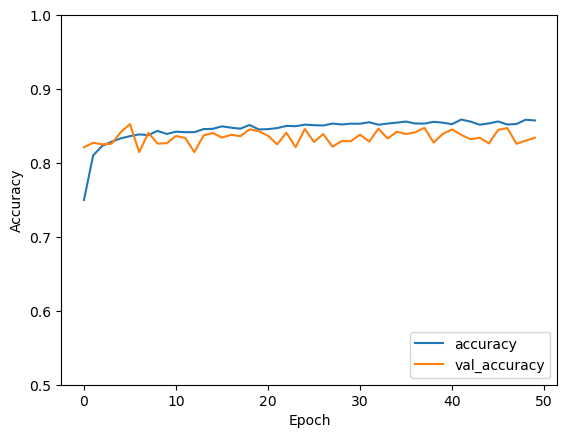

In [10]:

model = models.Sequential([
    layers.Dense(128, activation='relu'),      # First hidden layer with 128 neurons and ReLU activation
    layers.Dropout(0.2),                       # Dropout layer to prevent overfitting
    layers.Dense(10, activation='softmax')     # Output layer with 10 neurons (one for each class) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('\nTest accuracy:', test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()